In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm_notebook as tqm
import tensorflow as tf

from subbatch import Subbatch
from dataset import Dataset, Batch, model, DatasetIndex, action

%matplotlib inline

In [ ]:
BATCHSIZE = 1000
MNISTSIZE = 65000

ix = DatasetIndex(range(MNISTSIZE))
dset = Dataset(ix, Subbatch)

In [ ]:
iter_time = []
acc = []
times = []
grid = np.arange(1,BATCHSIZE)[(BATCHSIZE % np.arange(1,BATCHSIZE)) == 0]
for NUM_SUBBATCHES in grid:
    tf.reset_default_graph()
    sess = tf.Session()
    ppl = (dset.p
           .init_variable("NUM_SUBBATCHES", NUM_SUBBATCHES)
           .init_variable("session", sess)
           .load()
           .train(sess,iter_time,acc))

    for i in tqm(range(100)):
        ppl.next_batch(batch_size=BATCHSIZE, shuffle=True, n_epochs=10)
        #if (i+1) % 65 == 0:
        #    print("Epoch: {}, accuracy={}".format((i+1)/65, acc[-1]))
    #print("Subbatches: {}, accuracy={}".format(NUM_SUBBATCHES,acc[-1]))
    times.append(np.mean(iter_time[1:]))

In [18]:
iter_time = []
acc = []
times = []
tf.reset_default_graph()
sess = tf.Session()
ppl = (dset.p
       .init_variable("NUM_SUBBATCHES", 20)
       .init_variable("session", sess)
       .load()
       .train(sess,iter_time,acc)).run(batch_size=BATCHSIZE, shuffle=True, n_epochs=10)

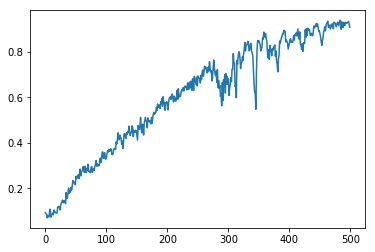

In [4]:
plt.plot(acc)
plt.show()

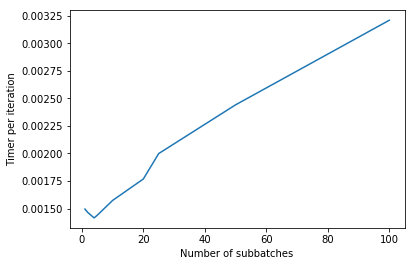

In [7]:
plt.plot(grid, times)
plt.xlabel('Number of subbatches')
plt.ylabel('Time per iteration')
plt.show()